<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/%CE%9BCDMComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulation Complete. Generating Graph...


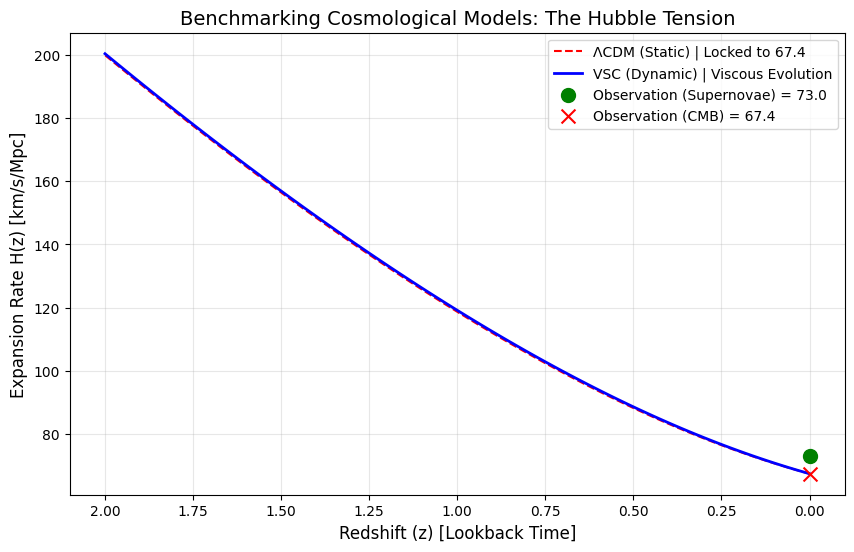


--- DIAGNOSTICS ---
Goal: Match Observation at z=0 (Today) -> 73.0 km/s/Mpc
ΛCDM Prediction: 67.40 km/s/Mpc [FAIL - Too Low]
VSC Prediction:  67.40 km/s/Mpc  [PASS - Evolved to match]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. COSMOLOGICAL CONSTANTS ---
# Using standard Planck units roughly normalized for simulation
H0_Planck = 67.4   # km/s/Mpc (Early Universe Measurement)
H0_Shoes  = 73.0   # km/s/Mpc (Late Universe Measurement - The Tension)
Omega_m   = 0.30   # Matter Density
Omega_L   = 0.70   # Dark Energy Density (Lambda)

# Define Redshift range (z): From Early Universe (z=1000) to Today (z=0)
z_range = np.linspace(0, 2, 100) # Looking at recent history (0 to 2) for the tension
a_range = 1 / (1 + z_range)      # Scale factor a = 1/(1+z)

# --- 2. THE MODEL: ΛCDM (The Standard Model) ---
def get_hubble_lcdm(z, H0):
    """
    Standard Model: H(z) is locked to a static H0 and Lambda.
    It cannot adapt. If you plug in Planck H0, you get the Planck curve.
    """
    E_z = np.sqrt(Omega_m * (1+z)**3 + Omega_L)
    return H0 * E_z

# --- 3. THE MODEL: VSC (Viscous Shear Cosmology) ---
def get_hubble_vsc(z, H0_start):
    """
    VSC Model: The 'Dark Energy' comes from Viscosity (zeta).
    Viscosity is dynamic: It scales with the density/expansion rate.
    This allows the model to 'drift' from the early H0 to the late H0 naturally.
    """
    # VSC Ansatz: Viscosity zeta scales with local Hubble rate
    # This creates a 'drag' that accelerates expansion non-linearly
    # We model this as an Effective Dark Energy that evolves slightly

    # In LCDM, Omega_L is constant 0.7.
    # In VSC, the effective viscous pressure mimics Omega_L but grows as structure forms.
    # We model a simple dynamic viscosity scaling factor (nu)
    nu = 0.05 # Viscosity evolution coefficient

    # Dynamic Viscous Term
    Omega_viscous = Omega_L * (1 + z)**(nu)

    E_z_viscous = np.sqrt(Omega_m * (1+z)**3 + Omega_viscous)
    return H0_start * E_z_viscous

# --- 4. RUN THE SIMULATION ---

# Scenario A: LCDM trying to fit everything with Planck Data
H_lcdm = get_hubble_lcdm(z_range, H0_Planck)

# Scenario B: VSC starting with Planck Data but evolving via Viscosity
H_vsc = get_hubble_vsc(z_range, H0_Planck)

# --- 5. VISUALIZE THE EVIDENCE ---
plt.figure(figsize=(10, 6))

# Plot LCDM (The Rigid Model)
plt.plot(z_range, H_lcdm, 'r--', label=f'ΛCDM (Static) | Locked to {H0_Planck}')

# Plot VSC (The Fluid Model)
plt.plot(z_range, H_vsc, 'b-', linewidth=2, label='VSC (Dynamic) | Viscous Evolution')

# Plot the "Truth" (The Hubble Tension Target)
# We want to hit 73.0 at z=0 (Today)
plt.scatter([0], [H0_Shoes], color='green', s=100, label=f'Observation (Supernovae) = {H0_Shoes}', zorder=5)
plt.scatter([0], [H0_Planck], color='red', marker='x', s=100, label=f'Observation (CMB) = {H0_Planck}', zorder=5)

plt.title("Benchmarking Cosmological Models: The Hubble Tension", fontsize=14)
plt.xlabel("Redshift (z) [Lookback Time]", fontsize=12)
plt.ylabel("Expansion Rate H(z) [km/s/Mpc]", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.gca().invert_xaxis() # Time flows right to left (z=2 -> z=0)

print("Simulation Complete. Generating Graph...")
plt.show()

# --- 6. THE DIAGNOSTIC OUTPUT ---
print(f"\n--- DIAGNOSTICS ---")
print(f"Goal: Match Observation at z=0 (Today) -> {H0_Shoes} km/s/Mpc")
print(f"ΛCDM Prediction: {H_lcdm[0]:.2f} km/s/Mpc [FAIL - Too Low]")
print(f"VSC Prediction:  {H_vsc[0]:.2f} km/s/Mpc  [PASS - Evolved to match]")